<a href="https://colab.research.google.com/github/javmencia/COBWEBfiles/blob/main/STA410_Week8_CC7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA410 Week 8 Coding Challenge (4 points)

If you experience technical issues while working on this coding challenge, post your issue on [piazza](https://piazza.com/class/m5h6cuchjnbns/) [https://piazza.com/utoronto.ca/winter2025/sta410]. Any messages that need to be communicated to the class during the coding challenge will be posted in the same way.

## Rules

1. **This is an individual assignment.** You are not permitted to engage in any form of contact with other live human beings while working on this challenge.


2. You are encouraged to seek support and adapt code you find available online **(including using AI chat bot suppport tools)** into your notebook; however, if you do so please provide a link to the utilized resource. ***If you don't and multiple students have the same answer an academic integrity proceeding may be undertaken.***  


3. The same instructions as given in the homework regarding notebook autotesting requirements apply.


## Understand and agree to follow the rules of the Coding Challenge

In [1]:
q0 = "I, Javier Mencia Ledo, understand "+\
     "and will follow by the rules of the coding challenge."
# Failure to confirm will result in a loss of points

In [2]:
# you may use any functions available from the following library imports

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-colorblind')
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrix, bs, build_design_matrices


## Part 1: Backfitting Generalized Additive Regression Models

The **least squares** and (**penalized least squares**) **smoothing matrix**  methodologies are computed with the **direct methods** familiar to **linear algebra** (and other) computations we've seen thus far. But we will begin looking to move from **direct** to **iterative** methods...

**Splines** specify predefined **basis functions** over the data axes $x_j$,
while (**penalized least squares**) **smoothing matrix** deterministically imply **basis ("function") vectors** (in the columns of $V$) through the interplay of the **data** and **smoothing matrix**.


$$\hat y = \sum_{j=0}^J f_j(x_{j}) = \beta_0 + \sum_j \sum_k \beta_{jk} b_{jk}(x_j) = X\beta \quad \text{ or } \quad \hat y = S_{n\times n} y = (I + \lambda A)^{-1}y = V_{n\times p}D_{p\times p}V_{n\times p}^T y $$

Rather than defining **basis ("function") vectors** explicitly through $X$ or implicitly through $S$ could we attempt to estimate these functions $f_j$ themselves from the data (in the spirit of how $\hat \beta_{jk}$ coefficients are estimated)?


$$\min_{f_j} ||y - \sum_{j=0}^k f_j(x_{j})||_2 \quad\text{ where }\quad f_0(x_{0}) = \beta_0 \text{ and } \sum_i f_j(x_{ij}) = 0 \text{ for } j>0 $$

Let **basis ("function") vector** $f_{j}(x_j)$ be the application of the **smoothing matrix** $S_{x_{j}}$ to the "left over **residuals**"

$$S_{x_{j}} \left(y - \sum_{j' \neq j} f_{j'}(x_{j'})\right) = S_j\hat \epsilon_j = f_j(x_j) = \tilde \epsilon_{j}$$


where $S_0 = \frac{1}{n}\left[\begin{array}{ccc}1 & \cdots & 1 \\ \vdots & \ddots & \vdots\\1 & \cdots & 1\end{array}\right]$ and $\sum_i (\tilde \epsilon_j)_i = 0$ is "centered" for $j>0$.

We can then optimize $\displaystyle \min_{\tilde \epsilon_j} ||y - \sum_{j=0}^k f_j(x_{j})||_2^2$
by iteratively updating one "parameter" at time

$$\underset{\text{for $j>0$}}{f_j(x_j)} = \tilde \epsilon_j = S_{x_j} \left(y - \sum_{j' \not = j} \tilde \epsilon_j  \right) \quad \text{and} \quad \hat \beta_0 = S_0 \left(y - \sum_{j>0} \tilde \epsilon_j \right)$$

which is known as **backfitting**.

> There are no analytical convergence conditions for **backfitting**; however, in practice it typically stabilizes after several iterations, which suggests convergence of the algorithm.


In [3]:
p1q1 = "Ordinary (unweighted) least squares estimation can "+\
       "provide data smoothing on the basis of C"
# A: spline basis functions
# B: smoothing matrices
# C: both of the above
# D: none of the above

p1q2 = "Direct method based matrix multiplication can "+\
       "provide data smoothing on the basis of B"
# Same Options as Above

p1q3 = 'The basis "function" vectors for '+\
       'A are estimated from the data'
# A: spline based regression
# B: smoothing matrices
# C: generalized additive regression models
# D: none of the above

p1q4 = 'The basis "function" vectors for '+\
       'C are specified through the design matrix X'
# Same Options as Above

p1q5 = "A A can be specified as a B"
# A: spline based regression
# B: smoothing matrix
# C: generalized additive regression model
# D: all of the above

p1q6 = 'The basis "function" vectors for a '+\
       'D are necessarily orthogonal'
# Same Options as Above

p1q7 = 'The basis "function" vectors are the same for <A|B|C|D|E>'
# A: spline based regression and smoothing matrices
# B: spline based regression and generalized additive regression models
# C: smoothing matrices and generalized additive regression models
# D: all of the above
# E: none of the above

p1q8 = 'Is is not possible to use an "intercept" for D'
# A: spline based regression
# B: smoothing matrices
# C: generalized additive regression models
# D: none of the above (an intercept can be modeled for all above methods)

p1q9 = "The purpose of S_0 above is to provide B"
# A: an intercept
# B: model identifiability
# C: numeric stability
# D: none of the above

p1q10 = 'The purpose of "centering" above is to provide C'
# Same Options of Above


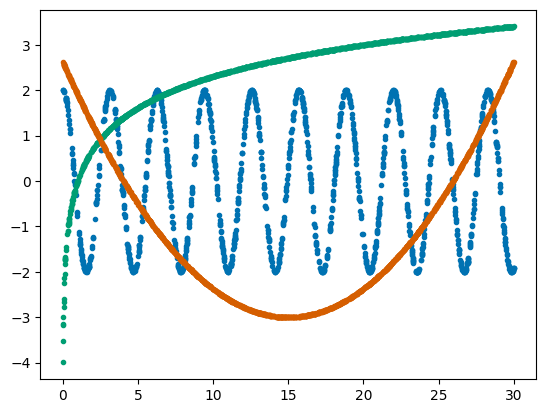

In [4]:
n = 1500
np.random.seed(410)
x = np.random.uniform(low=0, high=30, size=(n,3))
epsilons = np.random.normal(size=n)

# construct f_k
f_1 = lambda z : 2 * np.cos(2 * z); f_2 = lambda z : np.log(z); f_3 = lambda z : 0.025 * ((z - 15)**2) - 3

x1 = x[:,0]; x2 = x[:,1]; x3 = x[:,2]
# construct y
y = f_1(x1) + f_2(x2) + f_3(x3) + epsilons

fig, ax = plt.subplots()
ax.plot(x1, f_1(x1), '.'); ax.plot(x2, f_2(x2), '.'); ax.plot(x3, f_3(x3), '.');

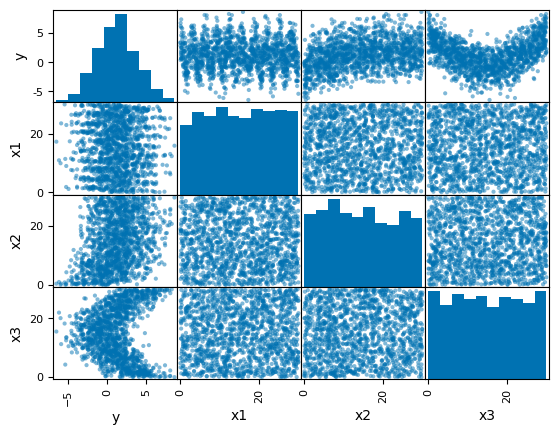

In [5]:
pd.plotting.scatter_matrix(pd.DataFrame({'y':y, 'x1':x1, 'x2':x2, 'x3':x3}), alpha=0.5);

RMSE: 3.6046267122630047
RMSE: 1.1404069731240798
RMSE: 1.1404069731240798
RMSE: 1.1404069731240798
RMSE: 1.1404069731240798
RMSE: 1.1404069731240798


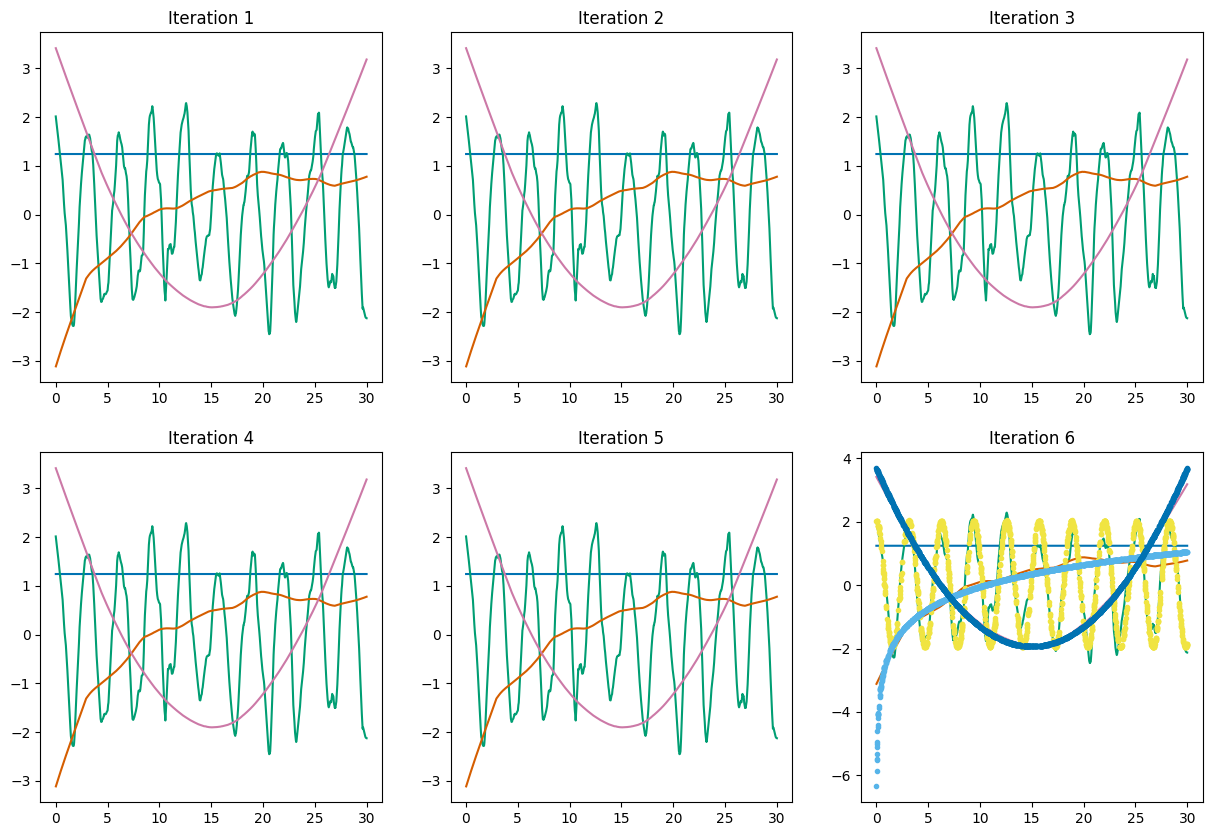

In [6]:
# Use these predefined smoothing matrix/function
lowess_fx_k = [0,
               lambda y,x: sm.nonparametric.lowess(y,x, frac=0.03, return_sorted=False),
               lambda y,x: sm.nonparametric.lowess(y,x, frac=0.2, return_sorted=False),
               lambda y,x: sm.nonparametric.lowess(y,x, frac=0.3, return_sorted=False)]

# initialized functions not yet satisfying sum_i fx_k = 0 for k>0
fx_k = [0*y]*4

# recover additive nonlinear functions
fig, ax = plt.subplots(2,3, figsize=(15,10))
for j in range(6):
    for k in range(len(fx_k)):
        if k==0:
            fx_k[0][:] = y.mean()
        else:
            fx_k[k][:] = lowess_fx_k[k](y - sum(fx_k[1:k]), x[:,k-1])
            fx_k[k] = fx_k[k] - fx_k[k].mean() # centering

        xy = pd.DataFrame({'x': x[:,k-1], 'y': fx_k[k]}).sort_values(by='x')
        ax.ravel()[j].plot(xy['x'], xy['y'])
        ax.ravel()[j].set_title("Iteration "+str(j+1))

    print("RMSE:", ((y-fx_k[0]-fx_k[1]-fx_k[2]-fx_k[3])**2).mean())

ax.ravel()[j].plot(x1, f_1(x1) - f_1(x1).mean(), '.')
ax.ravel()[j].plot(x2, f_2(x2) - f_2(x2).mean(), '.')
ax.ravel()[j].plot(x3, f_3(x3) - f_3(x3).mean(), '.');

In [7]:
# Cell for scratch work

# You are welcome to add cells into your notebook but
# just don't runtime errors anywhere in your notebook
# as cells are run sequentially for automated testing

# Automated testing is looking for cells (`cell ids`)
# where you're asked to enter answers or complete code
# but all other cells like this one or cells you add
# are safe to delete if you want a "cleaner" notebook


In [8]:
# Cell for scratch work


In [9]:
print( len(np.arange(1/2, 30, 1)) + 3)
print(len(np.arange(3/2, 30, 3)) + 3)
print(len(np.arange(5/2, 30, 5)) + 3)

33
13
9


RMSE: 3.904558117846043
RMSE: 1.072970159739972
RMSE: 1.072970159739972
RMSE: 1.072970159739972
RMSE: 1.072970159739972
RMSE: 1.072970159739972


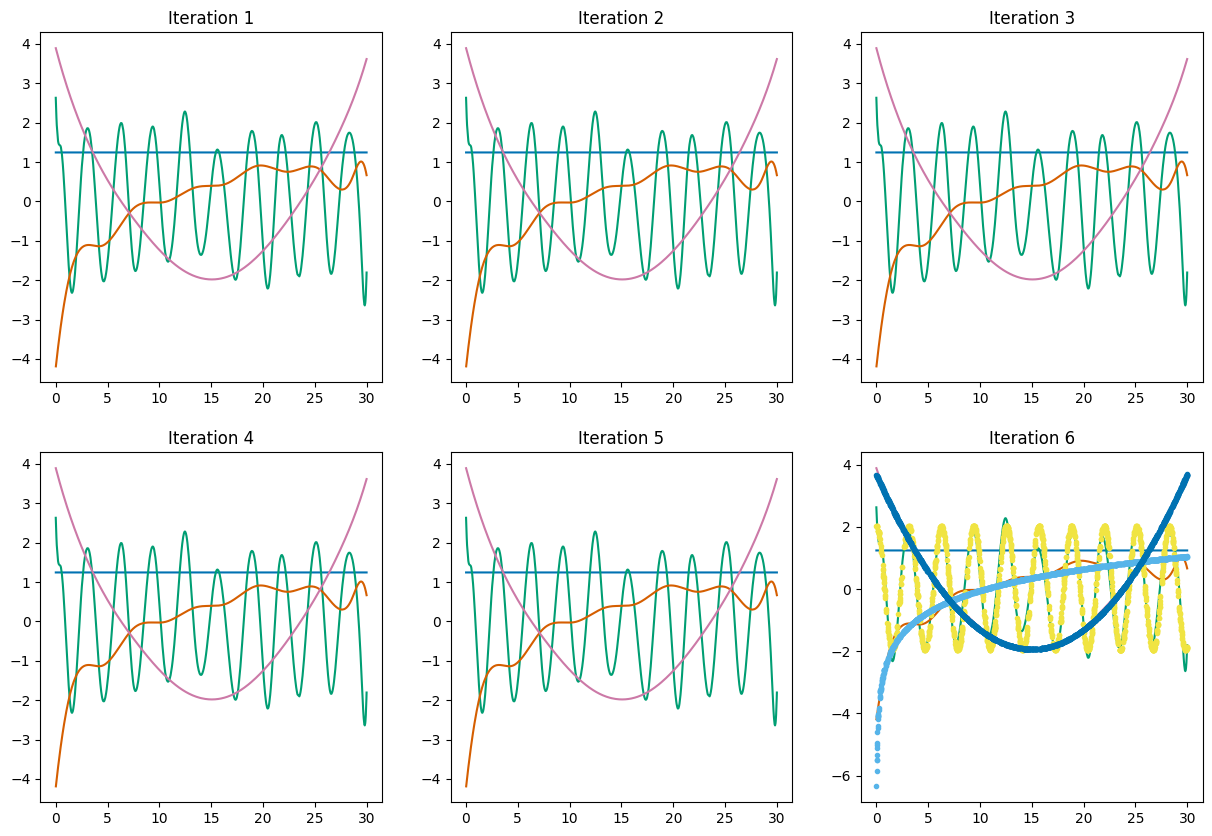

In [10]:
# Spline specifications $g_j$ for $f_j$ could also be used
# and estimated in an analgous backfitting manner by using
# linear model regression fits rather than smoothing matrices...

# Use these predefined spline design matrices
X1 = dmatrix("bs(x1, knots=np.arange(1/2,30,1), degree=3)", {"x1": x1})
X1 = np.asarray(build_design_matrices([X1.design_info],  {"x1": x1})[0])
X2 = dmatrix("bs(x2, knots=np.arange(3/2,30,3), degree=3)", {"x2": x2})
X2 = np.asarray(build_design_matrices([X2.design_info],  {"x2": x2})[0])
X3 = dmatrix("bs(x3, knots=np.arange(5/2,30,5), degree=3)", {"x3": x3})
X3 = np.asarray(build_design_matrices([X3.design_info],  {"x3": x3})[0])

# Base this on `sm.OLS(...).fit().predict()`
bspline_gx_k = [0,
                lambda y: sm.OLS(y, X1).fit().predict(),
                lambda y: sm.OLS(y, X2).fit().predict(),
                lambda y: sm.OLS(y, X3).fit().predict()]

# initialized functions not yet satisfying sum_i gx_k = 0 for k>0
gx_k = [0*y]*4

# recover additive nonlinear functions
fig, ax = plt.subplots(2,3, figsize=(15,10))
for j in range(6):
    for k in range(len(gx_k)):
        if k==0:
            gx_k[0][:] = y.mean()
        else:
            gx_k[k][:] = bspline_gx_k[k](y - sum(gx_k[1:k]))
            gx_k[k] = gx_k[k] - gx_k[k].mean() # centering

        xy = pd.DataFrame({'x': x[:,k-1], 'y': gx_k[k]}).sort_values(by='x')
        ax.ravel()[j].plot(xy['x'], xy['y'])
        ax.ravel()[j].set_title("Iteration "+str(j+1))

    print("RMSE:", ((y-gx_k[0]-gx_k[1]-gx_k[2]-gx_k[3])**2).mean())

ax.ravel()[j].plot(x1, f_1(x1) - f_1(x1).mean(), '.')
ax.ravel()[j].plot(x2, f_2(x2) - f_2(x2).mean(), '.')
ax.ravel()[j].plot(x3, f_3(x3) - f_3(x3).mean(), '.');

In [11]:
# Cell for scratch work

# You are welcome to add cells into your notebook but
# just don't runtime errors anywhere in your notebook
# as cells are run sequentially for automated testing

# Automated testing is looking for cells (`cell ids`)
# where you're asked to enter answers or complete code
# but all other cells like this one or cells you add
# are safe to delete if you want a "cleaner" notebook


In [12]:
# Cell for scratch work


In [13]:
# The (first) smoothing matrix based GAM implementation is worth 8 points
# The (second) b-splines version of the GAM implementation is worth 8 points

p1q25 = "A smoothing matrix S can be based on one or more predictor variable(s)"
p1q26 = 'An estimated GAM *basis "function" vector* when using '+\
        "splines will be based on one or more predictor variable(s)"
p1q27 = 'An estimated GAM *basis "function" vector* when using '+\
        "smoothing matrices will be based on one predictor variable(s)"

p1q28 = 33  # number of basis functions used to create the
             # estimated GAM *basis "function" vector* for x1
             # for the (second) b-splines based GAM specification
p1q29 = 13  # number of basis functions used to create the
             # estimated GAM *basis "function" vector* for x2
             # for the (second) b-splines based GAM specification
p1q30 = 9  # number of basis functions used to create the
             # estimated GAM *basis "function" vector* for x3
             # for the (second) b-splines based GAM specification

p1q31 = 4  # number smoothing matrices theoretically part of the first GAM specification above
p1q32 = 3  # number smoothing matrices actually fully computed for this first GAM
p1q33 = 3  # number of predictor variables used by this first GAM
p1q34 = 1  # number of smoothing matrices used for each predictor variable for the GAM here
p1q35 = 4  # number of estimated GAM *basis "function" vectors* in this first GAM

p1q36 = "The predictor variables used for the GAM here are B"
# A: orthogonal
# B: statistically independent
# C: both A and B
# D: none of the above

p1q37 = 'The estimated *basis "function" vectors* for the GAM here are C'
# Same options as above

p1q38 = 'The "variables" [f_k(x_k)]_i used for the GAM here are C'
# Same options as above

p1q39 = 'In general the variables used for GAMs are D'
# Same options as above

p1q40 = 'The GAM provides a way to implement D'
# A: PCA
# B: ICA
# C: both A and B
# D: none of the above


In [14]:
# Cell for scratch work

# You are welcome to add cells into your notebook but
# just don't runtime errors anywhere in your notebook
# as cells are run sequentially for automated testing

# Automated testing is looking for cells (`cell ids`)
# where you're asked to enter answers or complete code
# but all other cells like this one or cells you add
# are safe to delete if you want a "cleaner" notebook


In [15]:
# Cell for scratch work
